In [9]:
import pandas as pd
import numpy as np
from AHP import AHP
import statsmodels.api as sm
import matplotlib.pyplot as pl

In [2]:
# GDP
# 自然资源占有
# 自然资源损耗
# 温室气体排放
# 生物资源

# 给出判断矩阵
b = np.array([[1, 1 / 3, 1 / 4, 1/7, 1/9],
              [3, 1, 1 / 3, 1/3, 1/5],
              [4, 3, 1, 1, 1/5],
              [7, 3, 1, 1, 1/2],
              [9, 5, 5, 2, 1]])
# 算术平均法求权重
weight1 = AHP(b).cal_weight_by_arithmetic_method()
# 几何平均法求权重
weight2 = AHP(b).cal_weight__by_geometric_method()
# 特征值法求权重
weight = AHP(b).cal_weight__by_eigenvalue_method()[::-1]
AHP(b).test_consist()
weight

算术平均法计算得到的权重向量为：
 [0.03776485 0.08479054 0.17292596 0.22776022 0.47675843]
几何平均法计算得到的权重向量为：
 [0.51980141 0.2373293  0.11590198 0.08627704 0.04069027]
特征值法计算得到的权重向量为：
 [0.03735578 0.08161945 0.17091483 0.22095551 0.48915445]
判断矩阵的CI值为：(0.0430163682969531+0j)
判断矩阵的CR值为：(0.038407471693708124+0j)
判断矩阵的CR值为(0.038407471693708124+0j),通过一致性检验


array([0.48915445, 0.22095551, 0.17091483, 0.08161945, 0.03735578])

In [3]:
# 自然资源权重
# 淡水总量 森林面积 陆地海洋面积 农业用地面积
# 淡水总量 >= 农业用地 >= 森林 >= 陆地海洋
b = np.array([[1, 1 /2, 1 / 3, 1/4],
              [2, 1, 1/3, 1/4],
              [3, 3, 1, 1/3],
              [4, 4, 3, 1]])
# 特征值法求权重
weight_natural = AHP(b).cal_weight__by_eigenvalue_method()[::-1]
AHP(b).test_consist()
weight_natural

特征值法计算得到的权重向量为：
 [0.08936324 0.12614844 0.26112939 0.52335893]
判断矩阵的CI值为：(0.04799644756473853+0j)
判断矩阵的CR值为：(0.05392859276936914+0j)
判断矩阵的CR值为(0.05392859276936914+0j),通过一致性检验


array([0.52335893, 0.26112939, 0.12614844, 0.08936324])

In [4]:
# 损耗权重
# 人口密度 农业、林业和渔业增价 固定资本损耗 能源损耗 矿场损耗 森林资源损耗 可再生能源发电
# 固定资本损耗 > 农业、林业和渔业增价 > 可再生能源 > 能源 >= 矿场 >= 森林 > 人口密度
# 特征值法求权重
b = np.array([[1, 1 / 2, 1 / 3, 1/4, 1/4, 1/4, 1/7],
              [2, 1, 1 / 3, 1/4, 1/4, 1/4, 1/5],
              [3, 3,     1,   1/2,  1,   1,  1/4],
              [4, 4,     2,   1,  1/2,    1/2, 1/4],
              [4, 4,     1,   2,   1,    1,  1/3],
              [4, 4,     1,   2,   1,    1,  1/3],
              [7, 5,     4,   4,   3,    3,  1]])
weight_used = AHP(b).cal_weight__by_eigenvalue_method()[::-1]
AHP(b).test_consist()
weight_used

特征值法计算得到的权重向量为：
 [0.03522275 0.04611845 0.11220312 0.12632608 0.15352995 0.15352995
 0.37306969]
判断矩阵的CI值为：(0.05094217914466699+0j)
判断矩阵的CR值为：(0.037457484665196314+0j)
判断矩阵的CR值为(0.037457484665196314+0j),通过一致性检验


array([0.37306969, 0.15352995, 0.15352995, 0.12632608, 0.11220312,
       0.04611845, 0.03522275])

In [5]:
# 温室气体排放权重
# CO2 CH4 N2O Fs PM2.5
# air PM2.5
b = np.array([[1, 1/3],
              [3,1]])
# 特征值法求权重
weight_air = AHP(b).cal_weight__by_eigenvalue_method()[::-1]
AHP(b).test_consist()
weight_air

特征值法计算得到的权重向量为：
 [0.25 0.75]
判断矩阵的CI值为：0.0
判断矩阵的CR值为：nan
仅包含两个子因素，不存在一致性问题


/Users/koschei/Project/MathModel/MCM2023/AHP.py:25: RuntimeWarning: invalid value encountered in scalar divide
  self.CR_val = self.CI_val / (self.RI_list[self.n - 1])


array([0.75, 0.25])

In [6]:
# 生物多样性
# 保护区数目 濒危动物数目
b = np.array([[1, 1/2],
              [2,1]])
weight_animal = AHP(b).cal_weight__by_eigenvalue_method()[::-1]
AHP(b).test_consist()
weight_animal

特征值法计算得到的权重向量为：
 [0.33333333 0.66666667]
判断矩阵的CI值为：0.0
判断矩阵的CR值为：nan
仅包含两个子因素，不存在一致性问题


array([0.66666667, 0.33333333])

In [7]:
# 淡水总量 >= 农业用地 >= 森林 >= 陆地海洋
# 固定资本损耗 > 农业、林业和渔业增价 > 可再生能源 > 能源 >= 矿场 >= 森林 > 人口密度
print('GDP: {:.2f}%'.format(weight[0] * 100))
print('-自然资源-')
print('淡水总量: {:.2f}%'.format(weight[1] * weight_natural[0] * 100))
print('农业用地: {:.2f}%'.format(weight[1] * weight_natural[1] * 100))
print('森林: {:.2f}%'.format(weight[1] * weight_natural[2] * 100))
print('陆地海洋: {:.2f}%'.format(weight[1] * weight_natural[3] * 100))
print('-损耗-')
print('固定资本损耗: {:.2f}%'.format(weight[2] * weight_used[0] * 100))
print('农业、林业和渔业增价: {:.2f}%'.format(weight[2] * weight_used[1] * 100))
print('可再生能源: {:.2f}%'.format(weight[2] * weight_used[2] * 100))
print('能源: {:.2f}%'.format(weight[2] * weight_used[3] * 100))
print('矿场: {:.2f}%'.format(weight[2] * weight_used[4] * 100))
print('森林: {:.2f}%'.format(weight[2] * weight_used[5] * 100))
print('人口密度: {:.2f}%'.format(weight[2] * weight_used[6] * 100))
print('-温室气体和PM2.5-')
print('温室气体: {:.2f}%'.format(weight[3] * weight_air[0] * 100))
print('PM2.5: {:.2f}%'.format(weight[3] * weight_air[1] * 100))
print('-生物多样性损耗-')
print('保护区数目: {:.2f}%'.format(weight[4] * weight_animal[0] * 100))
print('濒危物种数目: {:.2f}%'.format(weight[4] * weight_animal[1] * 100))

GDP: 48.92%
-自然资源-
淡水总量: 11.56%
农业用地: 5.77%
森林: 2.79%
陆地海洋: 1.97%
-损耗-
固定资本损耗: 6.38%
农业、林业和渔业增价: 2.62%
可再生能源: 2.62%
能源: 2.16%
矿场: 1.92%
森林: 0.79%
人口密度: 0.60%
-温室气体和PM2.5-
温室气体: 6.12%
PM2.5: 2.04%
-生物多样性损耗-
保护区数目: 2.49%
濒危物种数目: 1.25%


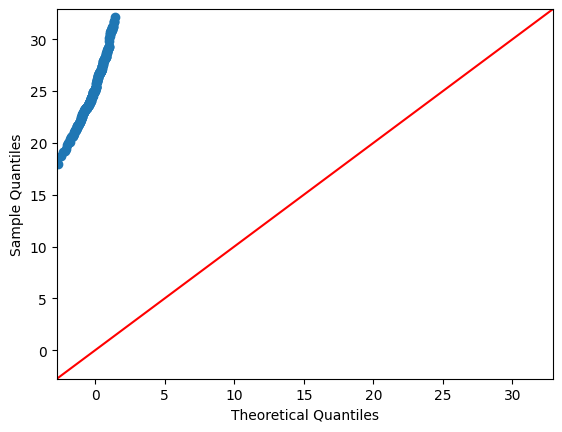

In [47]:
# 创建100个服从正太分布的数据集
data = pd.read_excel('./指标/GDP横截面.xlsx')
# 创建 Q-Q 图，并增加 45度线
fig = sm.qqplot(data[data.keys()[2]].values, line='45')
plt.show()

In [32]:
data[data.keys()[1]].values

array([4.23627422e+11, 1.14861006e+12, 3.92275107e+11, 5.72224908e+10,
       4.81420883e+11, 2.20887165e+12, 1.61734337e+12, 2.17105420e+11,
       6.08716387e+12, 2.86563100e+11, 2.09069941e+11, 3.21995279e+11,
       2.18983666e+11, 1.95234773e+10, 2.49424311e+11, 2.64518788e+12,
       3.39966782e+12, 2.97124962e+11, 1.67561534e+12, 7.55094160e+11,
       2.21913561e+11, 2.38364092e+11, 2.13609996e+12, 5.75907177e+12,
       1.48047348e+11, 1.14406697e+12, 3.84439070e+10, 2.55016609e+11,
       1.05780130e+12, 7.18948182e+09, 8.47380859e+11, 1.46517541e+11,
       4.28757038e+11, 1.77165635e+11, 2.08368727e+11, 4.75696614e+11,
       2.38113003e+11, 1.52491747e+12, 5.28207333e+11, 2.39809388e+11,
       4.17365077e+11, 1.42210820e+12, 4.95812559e+11, 5.98851029e+11,
       3.41104820e+11, 7.76992600e+11, 1.41209864e+11, 2.89787453e+11,
       2.49139749e+12, 1.50489644e+13])

[-33.60313029  13.63880468  84.47006855 -20.0020242   -9.92335356
   1.4615838   26.83705922  38.096386    70.76611281  36.97792227
  12.26966246  70.4033537   45.98088497 -50.80989872 126.16020258
  92.87654108   7.5985742   31.62804448  73.271785     7.42316512
  47.13547878  63.60145284 -29.65233994 -11.50260156  55.5419695
  35.27583699  55.64704865   9.16700736   2.28377072 -72.94013693
 -35.42401877  17.07090816  51.28051766  38.37184813   9.35735314
   3.04205107  24.55590384  18.44129197  76.80000266  21.4433939
 -50.17482234 -40.99255794  81.82541083 -36.5310603   48.63788793
   3.19159965   7.53063507   9.09815756  68.74093822   6.51495954
  13.53395155 -52.35535389  24.09438252  38.36587031  25.52240555
  76.50743549  17.42753961  28.15500807  87.53417645 -53.20062433
  -5.0563153   77.75098509  56.18968253  44.84872435  51.63663254
  29.3909132   86.79028681  31.62140347  25.55415266  21.99418166
  23.48601404 -35.90876036  48.9096144    9.26065171  95.16426431
  11.6713792

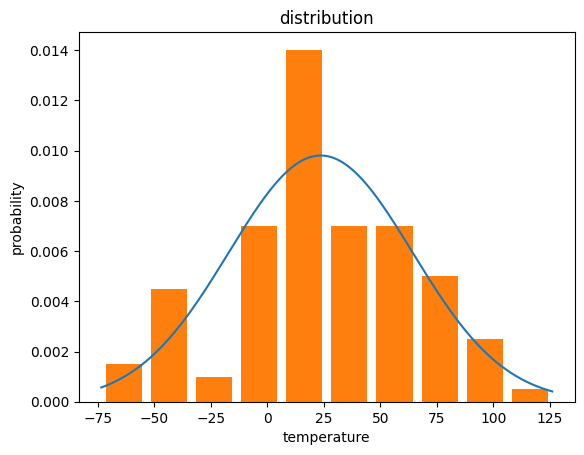

In [42]:
# 根据均值、标准差,求指定范围的正态分布概率值
def normfun(x, mu, sigma):
    pdf = np.exp(-((x - mu)**2)/(2*sigma**2)) / (sigma * np.sqrt(2*np.pi))
    return pdf
result = np.random.normal(15, 44, 100) # 均值为0.5,方差为1
print(result)
x = np.arange(min(result), max(result), 0.1)
# 设定 y 轴，载入刚才的正态分布函数
print(result.mean(), result.std())
y = normfun(x, result.mean(), result.std())
plt.plot(x, y) # 这里画出理论的正态分布概率曲线

# 这里画出实际的参数概率与取值关系
plt.hist(result, bins=10, rwidth=0.8, density=True) # bins个柱状图,宽度是rwidth(0~1),=1没有缝隙
plt.title('distribution')
plt.xlabel('temperature')
plt.ylabel('probability')
# 输出
plt.show() # 最后图片的概率和不为1是因为正态分布是从负无穷到正无穷,这里指截取了数据最小值到最大值的分布